<a href="https://colab.research.google.com/github/snchimata/airbnb_boston_sentiment_analysis/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Airbnb Boston Data Analysis
## Reviews Sentiment Analysis & relationship with Price

### Analysis on price of a listing and dependency on reviews - if yes, how does it varies?


In [0]:
# Import libraries
import io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install plotly-express
import plotly_express as px

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Load data

In [0]:
#calender = pd.read_csv("calendar.csv") 
listings = pd.read_csv("listings.csv") 
reviews = pd.read_csv("reviews.csv")

In [0]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [0]:
reviews = reviews.dropna()

#### Using built-in analyzer of NLTK library to assign polarity score to each comment to retrieve the 'sentiment' of comments - 'negative', 'neutral', 'positive', and 'compound'.

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment = reviews['comments'].apply(lambda x : sid.polarity_scores(x))
reviews=pd.concat([reviews,sentiment.apply(pd.Series)],1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [0]:
# Rounding compond sentiment score
reviews['compound'] = reviews['compound'].round(1)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,neu,pos,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.0,0.648,0.352,1.0
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.639,0.361,0.9
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.767,0.233,1.0
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.673,0.327,0.9
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.637,0.363,0.9


In [0]:
reviews[reviews['compound']<-0.25].comments.head(10)

12     Mi estadía en Boston aunque corta fue muy buen...
17     Izzy was great... had clear instructions and n...
24     We didn´t meet Izzy at all!!!! After we arrive...
64     Parking situation was bad.  Very hard to find ...
83     Una casa muy acogedora, muy cerca (a menos de ...
165    L'amfitrió no va contestar cap dels meus e-mai...
213    nothing what I expected !\nwe start from the p...
442    Honestamente, tengo que comentar que lo mejor ...
475    Sean fue un anfitrion muy educado pasamos unas...
486    The listing is accurate. This is a no frills k...
Name: comments, dtype: object

#### Plot Review count by Sentiment score

In [0]:
fig = px.histogram(x="compound",data_frame=reviews 
             ,title="Review count by Sentiment score"
             ,color="compound"
             ,template='seaborn'
             ,labels={"compound": "sentiment score"}
             )
fig.update_layout(showlegend=False)

A minimal number of comments were classified as having negative sentiment score. A significant amount of comments were scored exactly with 0.0 sentiment score. Plot shows a moderate number of comments are classified neutral, and a significant amount of comments are classified as positive.
This indicates an overall postive experiences of customers in Boston area with Airbnb offerings.

The number of reviews directly correlates with the number of stays, which depends on various factors like listing start date, how long it is advertised, and various additional factors.
However, it could serve to be useful information to see the correlation between price and the number of reviews. Let us check if there is any relationship between number of reviews, rating and price of listing

#### Plot relation between 'Review scores rating', 'number of reviews' and 'price'

In [32]:
px.scatter_3d(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,z="review_scores_rating"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"}
            ,width=1400, height=900
            )

#### Plot number of reviews by price

In [0]:
px.scatter(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews"})

#### Plot number of reviews by review score rating

In [0]:
px.scatter(data_frame=listings,
           x="review_scores_rating",
           y="number_of_reviews"
           ,color="number_of_reviews"
           ,template='seaborn'
           ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"})

The plots show that listings with prices range between \$40 and \$400 get the most reviews, probably because of the reasonable price range for larger sections of the customers. Review count quickly declines as the price move in an upward trend, indicating more people book listings that are between \$40–\$400 in prices. Prices in the range \$400 to \$1000 also show a moderate amount of comments indicating the price is not the only factor for a booking. Henceforth Prices and Number of reviews has an inverse relation to an extent after the reasonable price range. Review count decreases with increasing the prices beyond a reasonable range which is directly proportional to the number of bookings. 

3D plots show a high review score rating and the number of reviews are observed with price ranges between \$40–\$400.

Identify the most common words in all the comments.

In [0]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
text = " ".join(review for review in reviews.comments)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 24126265 words in the combination of all reviews.


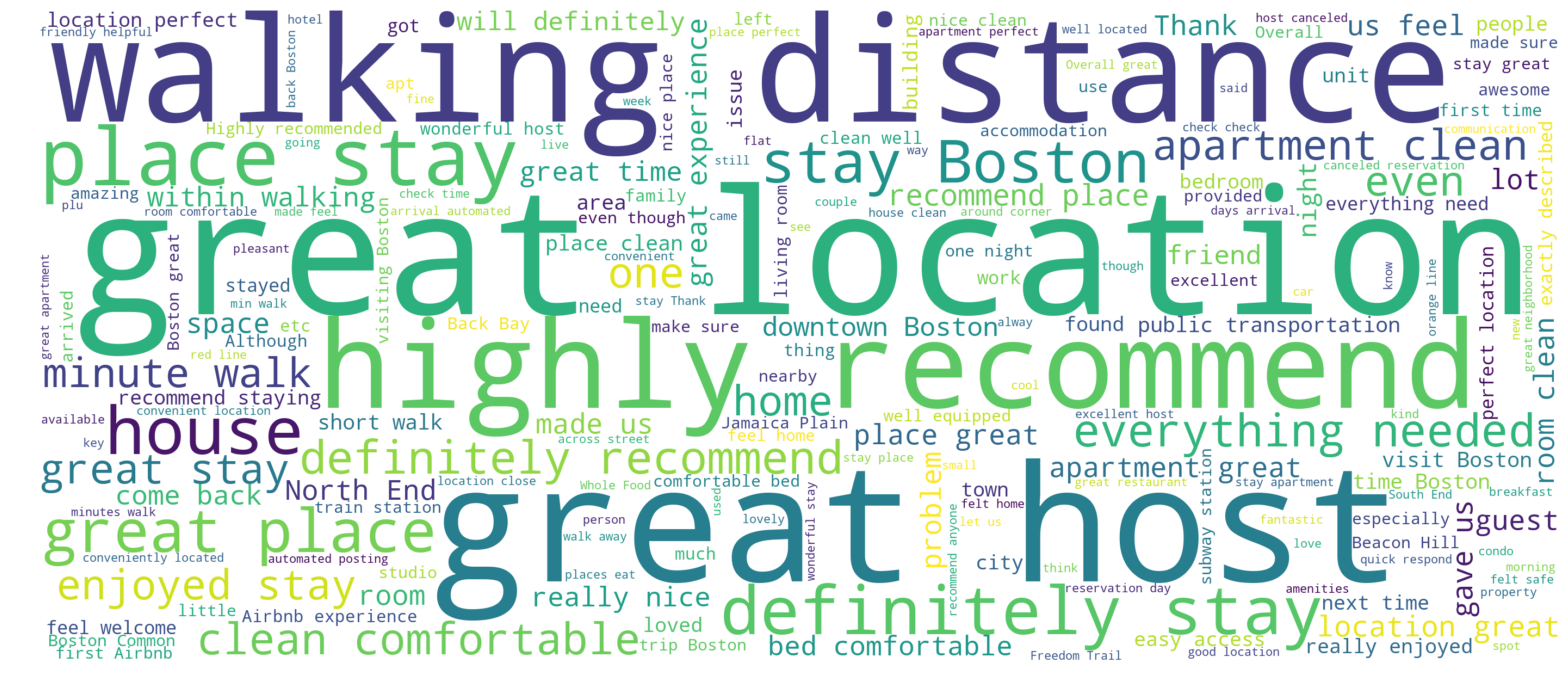

In [0]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Lisa", "Sean", "Brian", "Izzy"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2800, height = 1200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(28,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the plot, most talked about words are "great location", "great host", "walking distance" and "highly recommended".
Comments like "highly recommended", "great location" helps attain travellers attention. Reviews and comments plays a vital role in attracting the attention of travellers. 

## Price prediction model and features influence on rental price

#### Feature engineering and explore the data

In [0]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3.585000e+03,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585.000000,3585.000000,3585,3585,3585,3585,3042,3585,...,3575.000000,3576.000000,3585,3585,56.000000,3585,892,888,1342,2478,3585.000000,3585,3585.000000,3.585000e+03,3585,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585,3585.000000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,NaN,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,NaN,NaN,83,2,2,1239,30,25,...,NaN,NaN,5,3092,NaN,324,243,288,54,79,NaN,51,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,1,NaN,975,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/8439661,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Studio offers the luxury of home furnishings w...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...","You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/271b6df5-5...,https://a1.muscache.com/im/pictures/55215341/e...,https://a0.muscache.com/im/pictures/248513/fb3...,https://a2.muscache.com/im/pictures/1a1cd757-f...,NaN,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,NaN,NaN,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,...,NaN,NaN,Real Bed,{},NaN,$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,NaN,$0.00,NaN,NaN,today,NaN,NaN,NaN,NaN,NaN,2016-09-06,NaN,2016-04-05,2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3585,8,21,17,7,3585,21,44,26,48,58,44,1,1,1,1,NaN,136,138,137,2421,79,1384,2072,1210,3178,136,136,375,NaN,NaN,930,3577,2603,64,364,343,...,NaN,NaN,3453,32,NaN,144,48,30,299,353,NaN,2211,NaN,NaN,833,NaN,NaN,NaN,NaN,NaN,3585,NaN,23,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3585,NaN,NaN,2991,1582,3518,3348,NaN,NaN
mean,8.440875e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.492311e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
def dqr(df):
    dq = pd.DataFrame({'VariableNames': df.columns, 
                     'Datatype':df.dtypes,
                     'NoofRecordes': len(df),
                     'UniqueRecords': df.nunique(),
                     'DataAvailable': df.count(),  
                     'MissingCount': df.isnull().sum(),
                     'AvailablePercent': df.count()/len(df),
                     'MissingPercent': df.isnull().sum()/len(df),
                     'Variance': df.var(axis = 0)},index = df.columns)
    dqr = pd.concat([dq,df.describe(include='all').T],axis = 1 )
    dqr.reset_index(drop=True, inplace=True)
    return dqr

In [0]:
# Exploratory data analysis
dqr(listings)

,VariableNames,Datatype,NoofRecordes,UniqueRecords,DataAvailable,MissingCount,AvailablePercent,MissingPercent,Variance,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,id,int64,3585,3585,3585,0,1.000000,0.000000,2.025708e+13,3585,NaN,NaN,NaN,8.44087e+06,4.50079e+06,3353,4.67932e+06,8.57762e+06,1.27895e+07,1.49335e+07
1,listing_url,object,3585,3585,3585,0,1.000000,0.000000,NaN,3585,3585,https://www.airbnb.com/rooms/8439661,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,scrape_id,int64,3585,1,3585,0,1.000000,0.000000,7.253610e-01,3585,NaN,NaN,NaN,2.01609e+13,0.851681,2.01609e+13,2.01609e+13,2.01609e+13,2.01609e+13,2.01609e+13
3,last_scraped,object,3585,1,3585,0,1.000000,0.000000,NaN,3585,1,2016-09-07,3585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,name,object,3585,3504,3585,0,1.000000,0.000000,NaN,3585,3504,Lux 2BR by Fenway w/WiFi,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,summary,object,3585,3113,3442,143,0.960112,0.039888,NaN,3442,3113,"The unit is stylishly designed for comfort, va...",21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,space,object,3585,2268,2528,1057,0.705160,0.294840,NaN,2528,2268,The studio's kitchenette comes equipped with a...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,description,object,3585,3423,3585,0,1.000000,0.000000,NaN,3585,3423,Studio offers the luxury of home furnishings w...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,experiences_offered,object,3585,1,3585,0,1.000000,0.000000,NaN,3585,1,none,3585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,neighborhood_overview,object,3585,1728,2170,1415,0.605300,0.394700,NaN,2170,1728,Conveniently bordering the neighborhoods of th...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
listings.shape

(3585, 95)

In [0]:
listings.isnull().sum().sort_values(ascending=False).head(20)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
dtype: int64

In [0]:
# Feature engineering

def clean_percentages(x):
    """ 
    cleans the percentages columns
    transforms data from 20% to 0.20
    """
    x = float(x[:-1])/100
    return x

def clean_zipcode(x):
    """
    cleans the zip code columns & converts zipcode to 5 digits
    """
    x = x[:5]
    return int(x)

In [0]:
columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                   'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
                   'extra_people','security_deposit','host_listings_count','availability_365',
                   'availability_60','availability_90','calculated_host_listings_count','reviews_per_month',
                   'number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value', 'requires_license', 'instant_bookable',
                   'cancellation_policy','cleaning_fee']

In [0]:
listings_X = listings[columns_to_keep].copy()

In [0]:
len(columns_to_keep)

34

In [0]:
# fill columns corresponding to fill_by_mode with their mode values
fill_by_mode = ['zipcode', 'host_response_time','property_type','host_response_rate','host_acceptance_rate']
for fill in fill_by_mode:
    listings_X[fill].fillna(listings_X[fill].mode()[0], inplace=True)

In [0]:
listings_X['zipcode'] = listings_X['zipcode'].apply(lambda x: clean_zipcode(x))

In [0]:
listings_X['host_response_rate'] = listings_X['host_response_rate'].apply(lambda x: clean_percentages(x))

In [0]:
listings_X['host_acceptance_rate'] = listings_X['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

In [0]:
listings_X['price'] = listings_X.price.str.replace('$','').str.replace(',','').astype(float)
listings_X['cleaning_fee'] = listings_X.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)
listings_X['security_deposit'] = listings_X.security_deposit.str.replace('$','').str.replace(',','').astype(float)

In [0]:
# fill columns corresponding to fill_by_mean with their mean values
fill_by_mean = listings_X.select_dtypes(include=['int64', 'float64']).columns[listings_X.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()
for fillmn in fill_by_mean:
    listings_X[fillmn].fillna(listings_X[fillmn].mean(), inplace=True)

In [0]:
# One hot encoding categorical variables
final_data = pd.get_dummies(listings_X,drop_first=True)

In [0]:
# Splitting the dataset into the Training set and Test set
y = final_data[['price']]
X = final_data.drop('price', axis=1)

In [0]:
X.head()

,host_response_rate,host_acceptance_rate,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,security_deposit,host_listings_count,availability_365,availability_60,availability_90,calculated_host_listings_count,reviews_per_month,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cleaning_fee,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,...,extra_people_$24.00,extra_people_$25.00,extra_people_$27.00,extra_people_$29.00,extra_people_$30.00,extra_people_$33.00,extra_people_$34.00,extra_people_$35.00,extra_people_$36.00,extra_people_$37.00,extra_people_$39.00,extra_people_$40.00,extra_people_$42.00,extra_people_$44.00,extra_people_$45.00,extra_people_$49.00,extra_people_$5.00,extra_people_$50.00,extra_people_$55.00,extra_people_$58.00,extra_people_$59.00,extra_people_$6.00,extra_people_$60.00,extra_people_$62.00,extra_people_$65.00,extra_people_$69.00,extra_people_$7.00,extra_people_$70.00,extra_people_$75.00,extra_people_$77.00,extra_people_$8.00,extra_people_$80.00,extra_people_$85.00,extra_people_$88.00,extra_people_$89.00,extra_people_$9.00,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,1.0,1.00,2131,4,1.5,2.0,3.0,2,324.698212,1,0,0,0,1,1.970908,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,35.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1.00,2131,2,1.0,1.0,1.0,2,95.000000,1,359,54,84,1,1.300000,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,10.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,1.0,0.88,2131,2,1.0,1.0,1.0,3,324.698212,1,319,46,61,1,0.470000,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,68.380145,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,0.50,2116,4,1.0,1.0,2.0,1,100.000000,1,98,16,26,1,1.000000,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,50.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,1.00,2131,2,1.5,1.0,2.0,2,324.698212,1,334,34,59,1,2.250000,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,15.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Scaling of dependant data variabes
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sscaler = StandardScaler()
scaled_features = sscaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.select_dtypes(include=['int64', 'float64']).columns)
X= pd.concat([scaled_features_df,X.select_dtypes(exclude=['int64', 'float64'])], axis =1)

In [0]:
# Scaling of target data variable
mscaler = MinMaxScaler()
y = pd.DataFrame(mscaler.fit_transform(y), columns=y.columns)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=88)

### Model and Validation

In [0]:
# Parameters
fit_params={
    "early_stopping_rounds":20, 
    "eval_metric" : 'mae', 
    "eval_set" : [(X_test,y_test)],
    'eval_names': ['valid'],
    'verbose': 1000
}

In [0]:
# Model - Light gradient boosting
import lightgbm as lgb
# instantiate model
clf = lgb.LGBMRegressor(num_leaves= 200, max_depth=10, 
                         random_state=88,
                         colsample_bytree=0.5,
                         subsample=0.75,
                         silent=True, 
                         metric='mae', 
                         n_jobs=-1, 
                         n_estimators=10000,
                         
                         learning_rate=0.001)

# Traning the model
clf.fit(X_train, y_train, **fit_params)


Training until validation scores don't improve for 20 rounds.
[1000]	valid's l1: 0.0143474
[2000]	valid's l1: 0.0118352
[3000]	valid's l1: 0.0110864
[4000]	valid's l1: 0.0108075
Early stopping, best iteration is:
[4877]	valid's l1: 0.0107057


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.001, max_depth=10,
              metric='mae', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=200,
              objective=None, random_state=88, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=0.75, subsample_for_bin=200000,
              subsample_freq=0)

In [0]:
# predicting X_test
y_pred = clf.predict(X_test)

In [0]:
# metrics
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

In [0]:
# print
print('Mean absolute error: ',mae)
print('Mean squared error: ',mse)
print('R2 Score: ',r2)

Mean absolute error:  0.010705744225450814
Mean squared error:  0.0003658759039626763
R2 Score:  0.31844670898966987


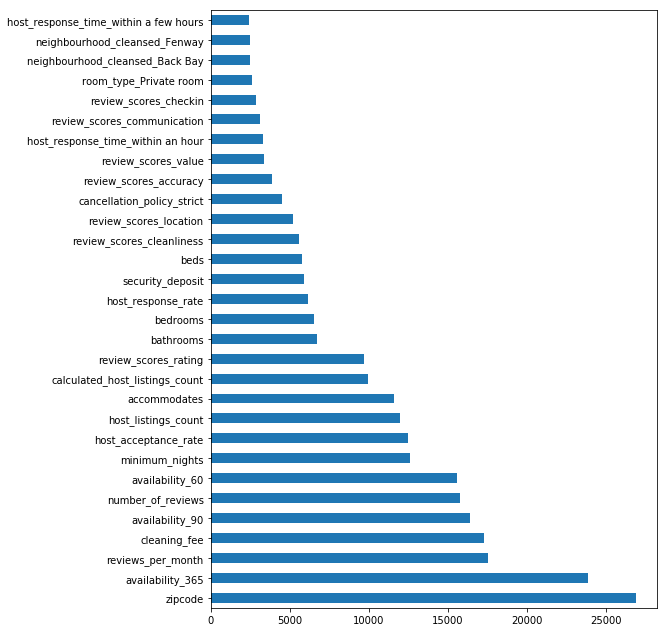

In [0]:
# Plotting features by importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,11))

In [0]:
#plt.figure(figsize=(28,22))
px.bar(pd.DataFrame(feat_imp).reset_index().rename(columns={0:'importance','index':'features'}).sort_values('importance', ascending=False).head(30)
       ,x = 'importance', y = 'features',orientation='h',width=1600, height=800)

Plotted top 30 features which play a vital role in driving rental price.

It is no surprise that zipcode is one of the top important features, as rental price highly depends on the location of the property. Reviews_per_month and number_of_reviews provide information on property bookings and guests satisfaction rate. Some other features such as availability,  cleaning_fee, minimum_nights, host_acceptance_rate and accommodates are also among the important feature list.

In [29]:
from plotly.offline import plot
plot(fig, filename="/content/test.svg", auto_open=False)

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `/content/test.svg` didn't end with .html. Adding .html to the end of your file.



'/content/test.svg.html'